<a href="https://colab.research.google.com/github/ajay-cz/ASSIGNMENT1_BLR_B2_G097/blob/master/ML_Assignment_2_Group_143.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**:

We have been provided with a dataset from Dream Club which connects borrowers with investors. We will use lending data from 2007-2010 and build a classifier model to predict whether or not the borrower has paid back their loan in full.

In [ ]:
from tensorflow import keras
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

%matplotlib inline
sns.set_style ('whitegrid')
plt.rcParams["patch.force_edgecolor"] = True

In [ ]:
file_read = r"loan_data.csv" 
loans_df = pd.read_csv(file_read)


# from google.colab import files
# import io


# uploaded = files.upload()
# print(uploaded)
# loans_df = pd.read_csv(io.BytesIO(uploaded['loan_data.csv']))

Saving loan_data.csv to loan_data (1).csv
{'loan_data.csv': b'credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid\r1,debt_consolidation,0.1189,829.1,11.35040654,19.48,737,5639.958333,28854,52.1,0,0,0,0\r1,credit_card,0.1071,228.22,11.08214255,14.29,707,2760,33623,76.7,0,0,0,0\r1,debt_consolidation,0.1357,366.86,10.37349118,11.63,682,4710,3511,25.6,1,0,0,0\r1,debt_consolidation,0.1008,162.34,11.35040654,8.1,712,2699.958333,33667,73.2,1,0,0,0\r1,credit_card,0.1426,102.92,11.29973224,14.97,667,4066,4740,39.5,0,1,0,0\r1,credit_card,0.0788,125.13,11.90496755,16.98,727,6120.041667,50807,51,0,0,0,0\r1,debt_consolidation,0.1496,194.02,10.71441777,4,667,3180.041667,3839,76.8,0,0,1,1\r1,all_other,0.1114,131.22,11.00209984,11.08,722,5116,24220,68.6,0,0,0,1\r1,home_improvement,0.1134,87.19,11.40756495,17.25,682,3989,69909,51.1,1,0,0,0\r1,debt_consolidation,0.1221,84.12,10.20359214,10,707,2730.04

## Q1 - Loading dataset and Printing Metadata for given dataset

In [ ]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
loans_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
loans_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


## Q2 - Countplot using sns showing the counts of loans by purpose,  with the color hue defined by not.fully.paid.

In [ ]:
loans_df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

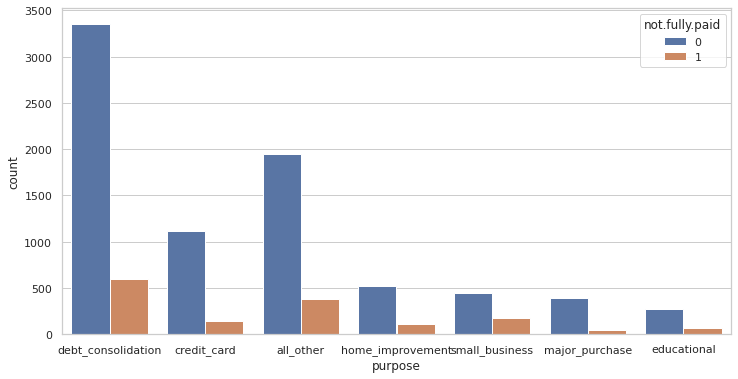

In [ ]:
plt.subplots(figsize = (12,6))
sns.countplot(x='purpose', hue='not.fully.paid', data = loans_df )

**Check If There are any NULL Values in given dataset**

In [ ]:
loans_df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [ ]:
loans_df.isnull().values.any()

False

### Above Findings show that there are NO NULL values in given Dataset

## Q3 - Heatmap showing NULL Values

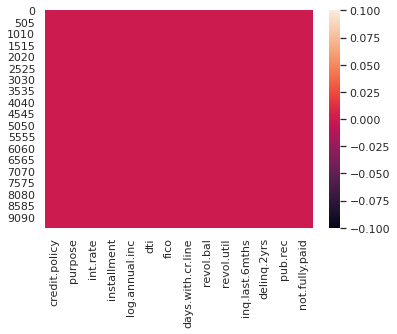

In [ ]:
sns.heatmap(loans_df.isnull())

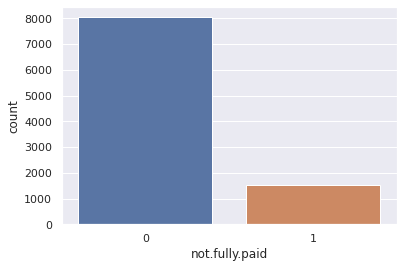

In [ ]:
sns.set()
sns.countplot(x='not.fully.paid', data=loans_df)

In [ ]:
not_paid, paid = loans_df['not.fully.paid'].value_counts()
f'There are {not_paid} instances for loan not paid & {paid} instances for loan fully paid category.'

'There are 8045 instances for loan not paid & 1533 instances for loan fully paid category.'

Above plot shows that we have class imbalance issue where there are very less samples available for fully paid borrowers vs not fully paid borrowers. 

Lets use oversampling to balance the dataset. 

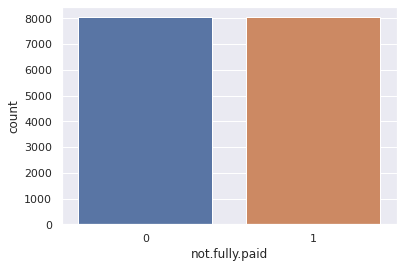

In [ ]:
count_paid_0, count_paid_1 = loans_df['not.fully.paid'].value_counts()
loans_df_0=loans_df[loans_df['not.fully.paid']== 0]
loans_df_1=loans_df[loans_df['not.fully.paid']== 1]
loans_df_1_sampled=loans_df_1.sample(count_paid_0, replace=True)
loans_df_test_sampled = pd.concat([loans_df_0, loans_df_1_sampled], axis=0)
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=loans_df_test_sampled)

In [ ]:
tanformed_feature = ['purpose']
final_data = pd.get_dummies(loans_df_test_sampled, columns=tanformed_feature, drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 0 to 687
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         16090

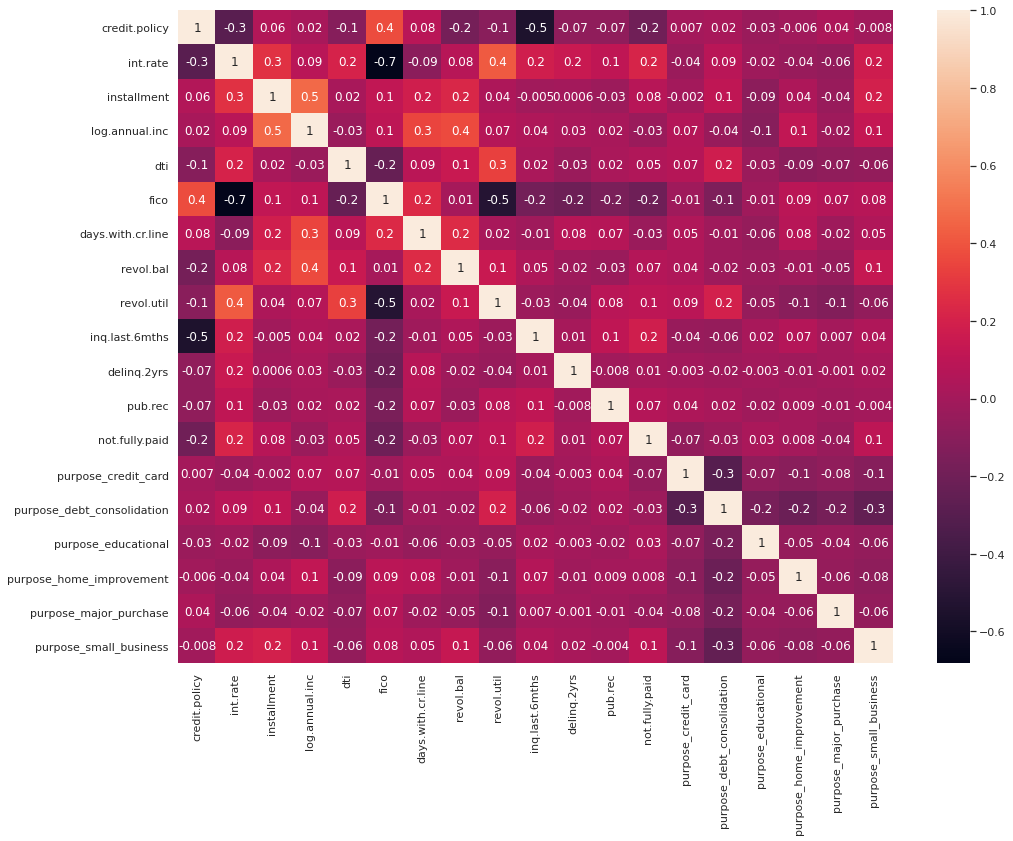

In [ ]:
plt.figure(
        figsize=[16,12]
)
sns.heatmap(
        data=final_data.corr(),         
        annot=True, 
        fmt='.1g'
    )

In [ ]:
to_train = final_data[final_data['not.fully.paid'].isin([0,1])]
print(to_train)

      credit.policy  int.rate  ...  purpose_major_purchase  purpose_small_business
0                 1    0.1189  ...                       0                       0
1                 1    0.1071  ...                       0                       0
2                 1    0.1357  ...                       0                       0
3                 1    0.1008  ...                       0                       0
4                 1    0.1426  ...                       0                       0
...             ...       ...  ...                     ...                     ...
2211              1    0.1189  ...                       0                       0
7870              0    0.1407  ...                       0                       0
1282              1    0.1191  ...                       0                       0
1916              1    0.1253  ...                       0                       0
687               1    0.1229  ...                       0                       0

[16

In [ ]:
final_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.00000,16090.000000,1.609000e+04,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000
mean,0.746551,0.126622,330.806798,10.921131,12.872676,705.78092,4506.935011,1.913337e+04,48.792857,1.895463,0.168055,0.074580,0.500000,0.117713,0.404475,0.039093,0.066998,0.040584,0.084525
std,0.434999,0.026865,215.132982,0.633008,6.935256,37.03553,2452.476442,4.570394e+04,29.165301,2.531548,0.533284,0.275877,0.500016,0.322278,0.490805,0.193821,0.250027,0.197331,0.278182
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.00000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.110300,166.770000,10.524064,7.410000,677.00000,2819.041667,3.252750e+03,24.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.126100,277.160000,10.915088,13.000000,702.00000,4109.500000,8.799000e+03,49.400000,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.144200,468.712500,11.289832,18.240000,732.00000,5700.041667,1.948625e+04,73.200000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.00000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Importing sklearn & keras packages

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# **Q-4: Performing stratified splitting of train and test data.**

In [ ]:
splitter=StratifiedShuffleSplit(n_splits=3, random_state=12)

#y = final_data.pop('not.fully.paid') #Target
#X = final_data

y = final_data.pop('not.fully.paid') #Targe
X = final_data

#X = to_train.drop('not.fully.paid', axis=1).values
#y = to_train['not.fully.paid'].values

for train, test in splitter.split(X, y):     #this will splits the index
    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]
    
#print(type(X_train))
#print(type(y_train))
print(y_train.value_counts())  
print(y_test.value_counts())

0    7241
1    7240
Name: not.fully.paid, dtype: int64
1    805
0    804
Name: not.fully.paid, dtype: int64


# **Q-5: Building a neural network classifier model using Keras.** (Binary Classifier)


In [ ]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = None

def keras_seq_model(add_dropout=False):
  model = Sequential()

  model.add(
          Dense(100, activation='relu')
  )

  if add_dropout:
    model.add(Dropout(0.2))


  model.add(
          Dense(50, activation='relu')
  )

  
  if add_dropout:
    model.add(Dropout(0.2))


  model.add(
          Dense(25, activation='relu')
  )

  
  if add_dropout:
    model.add(Dropout(0.2))



  model.add(
          Dense(1, activation='sigmoid')
  )

  model.compile(
          optimizer='adam', 
          loss='binary_crossentropy', 
          metrics=['accuracy']
  )

  early_stop = EarlyStopping(
          monitor='val_loss', 
          mode='min', 
          verbose=1, 
          patience=25
  )

  return model

model = keras_seq_model(True)
model.fit(
    X_train, 
    y_train,
    epochs=200,
    batch_size=256, 
    validation_data=(X_test, y_test)           
)

Epoch 1/200
57/57 [==============================] - 1s 6ms/step - loss: 0.6872 - accuracy: 0.5399 - val_loss: 0.6557 - val_accuracy: 0.6122
Epoch 2/200
57/57 [==============================] - 0s 3ms/step - loss: 0.6591 - accuracy: 0.6082 - val_loss: 0.6499 - val_accuracy: 0.6178
Epoch 3/200
57/57 [==============================] - 0s 3ms/step - loss: 0.6535 - accuracy: 0.6162 - val_loss: 0.6453 - val_accuracy: 0.6172
Epoch 4/200
57/57 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6163 - val_loss: 0.6418 - val_accuracy: 0.6234
Epoch 5/200
57/57 [==============================] - 0s 4ms/step - loss: 0.6457 - accuracy: 0.6173 - val_loss: 0.6401 - val_accuracy: 0.6172
Epoch 6/200
57/57 [==============================] - 0s 4ms/step - loss: 0.6486 - accuracy: 0.6187 - val_loss: 0.6397 - val_accuracy: 0.6234
Epoch 7/200
57/57 [==============================] - 0s 4ms/step - loss: 0.6434 - accuracy: 0.6233 - val_loss: 0.6388 - val_accuracy: 0.6203
Epoch 8/200
5

# **Q-6: Printing the confusion matrix and classification report**

In [ ]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import accuracy_score

print("The Test Accuracy of the model is: {} %".format(accuracy_score(y_test, predictions) * 100.)) 
print()
print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))

'''
p = (model.predict(X_test) > 0.5).astype('int')
print("The Test Accuracy of the model is: {} %".format(accuracy_score(y_test, p) * 100.)) 
print()
print(confusion_matrix(y_test, p))
print()
print(classification_report(y_test, p))
'''

The Test Accuracy of the model is: 78.49596022374146 %

[[605 199]
 [147 658]]

              precision    recall  f1-score   support

           0       0.80      0.75      0.78       804
           1       0.77      0.82      0.79       805

    accuracy                           0.78      1609
   macro avg       0.79      0.78      0.78      1609
weighted avg       0.79      0.78      0.78      1609



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'\np = (model.predict(X_test) > 0.5).astype(\'int\')\nprint("The Test Accuracy of the model is: {} %".format(accuracy_score(y_test, p) * 100.)) \nprint()\nprint(confusion_matrix(y_test, p))\nprint()\nprint(classification_report(y_test, p))\n'

# **Q-7: Find out the stratified cross validation accuracy**

In [ ]:
from sklearn.model_selection import StratifiedKFold

i = 0
kf = StratifiedKFold(n_splits=5, random_state=12, shuffle=True) 

acc_values = []
for train_index, test_index in kf.split(X, y):     
    print('\n{} of k-fold {}'.format(i, kf.n_splits))     
    
    __x_train, __x_test = X.iloc[train_index], X.iloc[test_index]     
    __y_train, __y_test = y.iloc[train_index], y.iloc[test_index]    
    model = None
    model = keras_seq_model()
    model.fit(
        __x_train, 
        __y_train,
        epochs=200,
        batch_size=256, 
        validation_data=(__x_test, __y_test),
        verbose=0           
    )     
    
    pred_test = (model.predict(__x_test) > 0.5).astype('int')
    score = accuracy_score(__y_test, pred_test)     
    print('accuracy_score', score)
    acc_values.append(score)     
    i+=1 

print()
f'The accuracy score for the given model post stratifed cross validation is ~ {np.mean(acc_values) * 100 } %. It shows the model created is overfitting and needs tuning.'



0 of k-fold 5
accuracy_score 0.5571783716594157

1 of k-fold 5
accuracy_score 0.5724052206339342

2 of k-fold 5
accuracy_score 0.6056556867619639

3 of k-fold 5
accuracy_score 0.5298321939092604

4 of k-fold 5
accuracy_score 0.5174021131137352



'The accuracy score for the given model post stratifed cross validation is ~ 55.6494717215662 %. It shows the model created is overfitting and needs tuning.'